Partie 1
#Chargement des données 

In [62]:
import pandas as pd
import re

def extract_data(input_path, pattern):
    with open(input_path, 'r') as file:
        content = file.read()
    matches = re.findall(pattern, content, re.MULTILINE)
    data = []
    for match in matches:
        numbers = match[1].replace('\n', ' ').split()
        numbers_float = [float(number) for number in numbers]
        data.append(numbers_float)
    return pd.DataFrame(data)

rocks_path = 'data/sonar.rocks'
mines_path = 'data/sonar.mines'

# Patterns for extracting train and test data
train_pattern = r'\*(CR|CM)\d+:\n\{([\d\s\.\n]+)\}'
test_pattern = r'^(?!\*)(CR|CM)\d+:\n\{([\d\s\.\n]+)\}'

# Extracting train and test data
rocks_train_df = extract_data(rocks_path, train_pattern)
mines_train_df = extract_data(mines_path, train_pattern)
rocks_train_df['Label'] = 'R'  
mines_train_df['Label'] = 'M' 
train_df = pd.concat([rocks_train_df, mines_train_df], ignore_index=True).sample(frac=1).reset_index(drop=True)

rocks_test_df = extract_data(rocks_path, test_pattern)
mines_test_df = extract_data(mines_path, test_pattern)
rocks_test_df['Label'] = 'R'  
mines_test_df['Label'] = 'M' 
test_df = pd.concat([rocks_test_df, mines_test_df], ignore_index=True).sample(frac=1).reset_index(drop=True)

print(len(train_df))
print(len(test_df)) 


104
104


Partie 2

## Apprentissage sur train

In [63]:
import numpy as np
def perceptron_online(training_features, training_labels, epochs=22000, learning_rate=0.0001):
    """
    Entraîne un perceptron en utilisant l'algorithme en ligne.

    :param training_features: numpy.ndarray, les caractéristiques d'entraînement.
    :param training_labels: numpy.ndarray, les étiquettes d'entraînement (doivent être -1 ou 1).
    :param threshold: int, le nombre d'itérations pour l'entraînement.
    :param learning_rate: float, le taux d'apprentissage.
    :return: numpy.ndarray, les poids appris.
    """
    # Initialisation des poids
    weights = np.zeros(training_features.shape[1] + 1)
    
    # Entraînement
    for _ in range(epochs):
        for inputs, label in zip(training_features, training_labels):
            # Calcul de la prédiction
            activation = np.dot(inputs, weights[1:]) + weights[0]
            if activation >= 0:
                prediction = 1
            else:
                prediction = -1
            
            # Mise à jour des poids basée sur l'erreur
            weights[1:] += learning_rate * (label - prediction) * inputs
            weights[0] += learning_rate * (label - prediction)
    
    return weights
def perceptron_batch(training_features, training_labels, epochs=22000, learning_rate=0.0001):
    """
    Entraîne un perceptron en utilisant l'algorithme batch.

    :param training_features: numpy.ndarray, les caractéristiques d'entraînement.
    :param training_labels: numpy.ndarray, les étiquettes d'entraînement (doivent être -1 ou 1).
    :param threshold: int, le nombre d'itérations pour l'entraînement.
    :param learning_rate: float, le taux d'apprentissage.
    :return: numpy.ndarray, les poids appris.
    """
    # Initialisation des poids
    weights = np.zeros(training_features.shape[1] + 1)
    
    # Entraînement
    for _ in range(epochs):
        # Initialisation du vecteur de mise à jour pour cette époque
        update = np.zeros(training_features.shape[1] + 1)
        
        for inputs, label in zip(training_features, training_labels):
            # Calcul de la prédiction
            activation = np.dot(inputs, weights[1:]) + weights[0]
            if activation >= 0:
                prediction = 1
            else:
                prediction = -1
            
            # Accumulation de la mise à jour basée sur l'erreur
            update[1:] += learning_rate * (label - prediction) * inputs
            update[0] += learning_rate * (label - prediction)
        
        # Mise à jour des poids à la fin de l'époque
        weights += update
    
    return weights

# Préparation des données
# Supposons que train_df est déjà défini et mélangé
# Convertir les étiquettes 'R' et 'M' en valeurs numériques -1 et 1
train_df['Label'] = train_df['Label'].apply(lambda x: 1 if x == 'M' else -1)
test_df['Label'] = test_df['Label'].apply(lambda x: 1 if x == 'M' else -1)

# Séparation des caractéristiques et des étiquettes
test_features = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values
print(test_labels)

# Séparation des caractéristiques et des étiquettes
train_features = train_df.iloc[:, :-1].values
train_labels = train_df.iloc[:, -1].values
print(train_labels)
# Entraînement du perceptron
weights = perceptron_batch(train_features, train_labels)

print(weights)


[ 1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1
 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1
 -1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1 -1  1
 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1
 -1 -1  1  1  1  1  1  1]
[ 1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1
  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1
  1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1
 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1
  1 -1  1 -1  1 -1  1 -1]
[-0.098       0.0842751   0.21072314  0.03838012  0.11038062  0.07259872
  0.14434456 -0.06594728 -0.15828186  0.00899288  0.10787674  0.038768
  0.01341432  0.00255996  0.0042866   0.05863472 -0.1958266  -0.05572258
  0.20306202 -0.0378772  -0.00970566 -0.03937258  0.05972566 -0.0440081
  0.1078278  -0.01139262 -0.01252908  0.01074978 -0.02024282 -0.019539
  0.

Test sur l'ensemble de test

In [64]:
# Supposons que `weights` est le vecteur de poids appris du perceptron
def predict_perceptron(inputs, weights):
    activation = np.dot(inputs, weights[1:]) + weights[0]
    return 1 if activation >= 0 else -1

# Supposons que test_df contient uniquement les caractéristiques sans les étiquettes
test_features = test_df.iloc[:, :60].values  # Sélectionne uniquement les colonnes de caractéristiques

# Faire des prédictions
predictions = [predict_perceptron(x, weights) for x in test_features]

# Affichage des prédictions
print(predictions)


[1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1]


Calcul de Ea et de Eg

In [65]:
# Fonction pour calculer la précision
def calculate_accuracy(features, labels, weights):
    predictions = [predict_perceptron(x, weights) for x in features]
    correct_predictions = sum(pred == label for pred, label in zip(predictions, labels))
    accuracy = correct_predictions / len(labels)
    return accuracy

# Convertir les étiquettes de l'ensemble de test en valeurs numériques -1 et 1
test_df['Label'] = test_df['Label'].apply(lambda x: 1 if x == 'M' else -1)

# Séparer les caractéristiques et les étiquettes de l'ensemble de test
test_features = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values

# Calculer la précision sur l'ensemble d'entraînement et de test
training_accuracy = calculate_accuracy(train_features, train_labels, weights)
testing_accuracy = calculate_accuracy(test_features, test_labels, weights)

# Calculer les erreurs d'apprentissage (Ea) et de généralisation (Eg)
Ea = 1 - training_accuracy
Eg = 1 - testing_accuracy

print(f"Erreur d'apprentissage (Ea) : {Ea}")
print(f"Erreur de généralisation (Eg) : {Eg}")

print("\n Poids appris du perceptron :")
print(weights)

Erreur d'apprentissage (Ea) : 0.0
Erreur de généralisation (Eg) : 0.5384615384615384

 Poids appris du perceptron :
[-0.098       0.0842751   0.21072314  0.03838012  0.11038062  0.07259872
  0.14434456 -0.06594728 -0.15828186  0.00899288  0.10787674  0.038768
  0.01341432  0.00255996  0.0042866   0.05863472 -0.1958266  -0.05572258
  0.20306202 -0.0378772  -0.00970566 -0.03937258  0.05972566 -0.0440081
  0.1078278  -0.01139262 -0.01252908  0.01074978 -0.02024282 -0.019539
  0.2048143  -0.30649636  0.23248804 -0.16053052  0.0743006  -0.04041242
 -0.02133034 -0.03860196 -0.02090698  0.17067118 -0.1526431   0.0636046
 -0.0140197  -0.01147842 -0.06595438  0.11983514  0.1035655  -0.10689164
  0.2105948   0.28900536 -0.12872816  0.05331192  0.05126696  0.030002
  0.0825407  -0.01197684 -0.02328594 -0.0544665   0.03433368 -0.01490698
 -0.01637436]


- ### C) Calculer les stabilités des P exemples de « test » selon la formule de gamma (distance a l’hyperplan séparateur avec les poids normés)

In [66]:
import numpy as np

def calculate_stabilities(test_features, test_labels, weights):
    """
    Calcule la stabilité de chaque exemple de test.

    :param test_features: numpy.ndarray, les caractéristiques de test (sans biais ajouté).
    :param test_labels: numpy.ndarray, les étiquettes de test (-1 ou 1).
    :param weights: numpy.ndarray, les poids appris (y compris le biais).
    :return: numpy.ndarray, les stabilités de chaque exemple de test.
    """
    # Séparation du poids du biais et des poids des caractéristiques
    b, w = weights[0], weights[1:]
    
    # Calcul de la norme des poids (sans le biais)
    norm_w = np.linalg.norm(w)
    
    # Calcul des activations (y_i * (w . x_i + b))
    activations = test_labels * (np.dot(test_features, w) + b)
    
    # Calcul des stabilités (activation / norm_w)
    stabilities = activations / norm_w
    
    return stabilities

# Supposons que test_df est déjà défini et contient les données de test
# Conversion des étiquettes 'R' et 'M' en -1 et 1 pour les données de test
test_df['Label'] = test_df['Label'].apply(lambda x: 1 if x == 'M' else -1)

# Séparation des caractéristiques et des étiquettes pour les données de test
test_features = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values

# Calcul des stabilités
stabilities = calculate_stabilities(test_features, test_labels, weights)

# Affichage des stabilités
print("Stabilités des exemples de test :")
print(stabilities)


Stabilités des exemples de test :
[-5.96504976e-02 -9.05518829e-02 -3.03179844e-02  3.21756163e-02
 -6.26573337e-02 -3.80358734e-02 -2.13590852e-02 -4.33566283e-02
  8.39413471e-03  1.41543218e-02  7.14157741e-02 -7.34300361e-02
 -1.02666393e-01 -1.64231512e-01  6.33179116e-02 -1.20962897e-01
 -5.67902197e-02  6.19599892e-03  1.10958679e-01  3.09456141e-02
  5.73721430e-02  2.34926850e-02 -1.27873356e-01  7.76958435e-03
  3.45330329e-03 -5.80111074e-02 -7.72975481e-03  4.61395923e-03
 -2.02613880e-01  4.06103879e-04  3.35312539e-02 -4.45109076e-02
 -7.86729195e-03  8.62746418e-02  6.81645634e-02 -6.48955084e-02
 -3.68482282e-02  2.84552463e-02 -7.98359344e-02  9.04707904e-02
 -9.61632053e-02  1.62313280e-02 -5.12863494e-02  1.08414199e-01
 -1.24244405e-01 -6.84133548e-03  7.44136000e-03  2.16342450e-02
  4.58058596e-02 -6.02908120e-02 -1.18357542e-01 -4.89606525e-02
  2.16896569e-03 -4.62131568e-02  2.49045765e-02 -1.28468489e-01
 -8.04233519e-03 -1.30402613e-01  5.07564928e-02 -9.7638

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
[ 1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1
  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1
  1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1
 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1
  1 -1  1 -1  1 -1  1 -1]


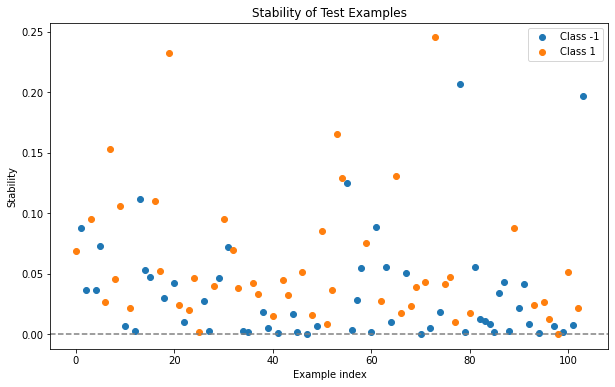

In [67]:
import numpy as np
import matplotlib.pyplot as plt

print(test_labels)
print(train_labels)

# Exemple des caractéristiques des exemples de test
test_features = train_df.iloc[:, :-1].values

# Exemple des étiquettes réelles des exemples de test
test_labels = train_df.iloc[:, -1].values

# Normalize the weights (excluding the bias term)
norm_weights = np.linalg.norm(weights[1:])

# Calculate the signed distance from the decision boundary for each example
signed_distances = (np.dot(test_features, weights[1:]) + weights[0]) / norm_weights

# Multiply by labels to get stabilities
stabilities = signed_distances * test_labels

# Plotting
plt.figure(figsize=(10, 6))
for label in np.unique(test_labels):
    plt.scatter(np.arange(len(stabilities))[test_labels == label], stabilities[test_labels == label], label=f'Class {label}')
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Example index')
plt.ylabel('Stability')
plt.title('Stability of Test Examples')
plt.legend()
plt.show()

- ## D) Graphique des stabilités


NameError: name 'mu' is not defined

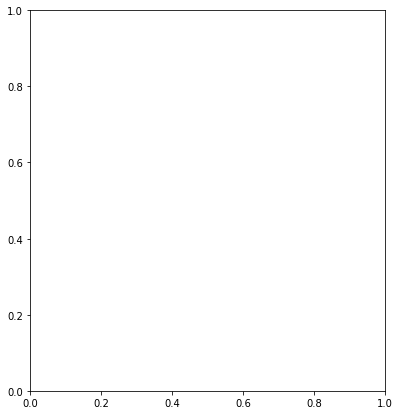

In [68]:
d = signed_distances

# Plot the data
plt.figure(figsize=(14, 7))

# Plot for (a)
plt.subplot(1, 2, 1)
plt.scatter(mu[t == 1], d[t == 1], c='black', label='t^u = +1')
plt.scatter(mu[t == -1], d[t == -1], c='grey', label='t^u = -1')
plt.title('(a) Training Set')
plt.xlabel('µ')
plt.ylabel('d^u')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()

# Plot for (b) could be another condition or dataset, we'll use the same data for this example
plt.subplot(1, 2, 2)
plt.scatter(mu[t == 1], d[t == 1], c='black', label='t^u = +1')
plt.scatter(mu[t == -1], d[t == -1], c='grey', label='t^u = -1')
plt.title('(b)')
plt.xlabel('µ')
plt.ylabel('d^u')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()